# **[ Project 04. Building End to End ML Project : Predicting Housing Prices With Advanced Regression Techniques ]**

## **0. 문제정의**
----

### **0-1. 프로젝트 목표**  

<div> 본 프로젝트의 목표는 집과 관련된 정보(위치,건물연식,방 갯수 등)가 주어졌을때 집값을 예측하는 모델을 구축하는 것이다.    
일반적으로 집값은 전문가나 집주인이 기존의 경험과 주변 집의 시세를 기반으로 가격을 책정한다. 하지만 집의 가격은 집의 위치, 건물의 연식, 방의 갯수 등 여러가지 복합적인 요인에 의해 결정되기마련인데, 개개인이 이러한 요인들을 하나하나 고려하기는 어렵다. 만약 데이터를 기반으로 집값을 예측하는 모델을 생성한다면 집값을 책정하는데 많은 도움이 될것이다. </div> 


### **0-2. 분석 데이터 정의** 


본 프로젝트에서는 [캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr) 에서 제공하는 주택가격데이터를 활용하였다.   

      
데이터 아래 표와 같이 구성되어있다. 해당 describe는 아래 링크들을 참고하였다. 
- https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
- https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/data

| 컬럼 | 설명 |
| --- | --- |
| ID | 집을 구분하는 번호 |
| date | 집을 구매한 날짜  |
| price |  집의 가격(Target variable)  |
| bedrooms | 침실의 수 |
| bathrooms | 화장실의 수</br> </br>- 0.25: 세면대  </br>- 0.5 : 세면대, 화장실</br>- 0.75 : 세면대, 화장실, 샤워실</br>- 1 : 세면대, 화장실, 샤워실, 욕조</br>- 2.5: (세면대, 화장실, 샤워실, 욕조) *2 개 + (세면대, 화장실) |
| sqft_living | 주거 공간의 평방 피트(면적) |
| sqft_lot | 부지의 평방 피트(면적) |
| floors | 집의 층 수  |
| waterfront | 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  |
| view |  집이 얼마나 좋아보이는지의 정도 |
| condition | 집의 전반적인 상태 |
| grade | King County grading 시스템 기준으로 매긴 집의 등급 </br></br>- 1\~3: 건축 및 설계 미달 </br>- 7: 건설 및 설계 평균</br>- 11~13: 높은 수준의 건설 및 디자인 |
| sqft_above | 지하실을 제외한 평방 피트(면적) |
| sqft_basement |  지하실의 평방 피트(면적) |
| yr_built | 지어진 년도 |
| yr_renovated | 집을 재건축한 년도 |
| zipcode | 우편번호 |
| lat | 위도 |
| long | 경도 |
| sqft_living15 |  근처 15 가구의 주거 공간, 평방 피트 |
| sqft_lot15 |  근처 15가구의 부지, 평방 피트 |   

 여기서 집의 가격을 책정하는 시점은 데이터를 수집한 시점인 2015년을 기준으로 한다. (아래 링크 참고)
 - https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/83957

추가적으로 컬럼에 대한 설명이 애매한것이 있어 두가지 각도로 바라보도록하겠다. (sqft_living15 과 같이ㅣ 15가 붙은것은 공식 대회 설명에는 15년 기준 평방피트인데, 같은 데이터셋의 다른 대회에서 sqft_living15를 근처 15개 가구의 평균치라고 보는 시선도 있다. 만약에 sqft_living15가 주변 가구의 평균치라고 한다면 완전히 접근하는 시각이 달라지기 때문에 이 부분은 한번 자세하게 찾아봐야할것같다. 만약에 sqft_living15값과 sqft_living값이 다르고 15년이나 바로직전에 재건축을 한 집이 있을경우에는 재건축으로 인한 값의 차이라고 볼 수 있지만 15년이나 바로직전에 재건축을 한적이없는데 두 값이 다르면 이것은 주변 15개 표준가격으로 볼수도있을것같다. 좀 더 정확하게 검증하려면 지도로 특정 집과 그 주변의 집의 sqft_living15을 시각화해보고 그 가격이 같다면 그것은 평균가로 봐도 무방하다고 생각이든다.  참고 링크 : https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/discussion/87472    ) 


### **0.3 모델링 task 정의**  


해당 데이터셋은	집의 가격(Price)이 Target variable인 지도학습에 속한다. 또한 여러개의 feature로 가격이라는 연속적인 값을 예측하므로 다중회귀에 속한다. 

## **1. 데이터 불러오기 및 확인**
---

### **1-1. 라이브러리, 클래스, 함수 불러오기**

In [33]:
############################################## 라이브러리 불러오기 #####################################################

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format #지수표현식말고 실수로 표현
import platform
import random
import statsmodels
import math
import warnings
warnings.filterwarnings(action = "ignore")
import missingno as msno
from scipy import stats
from scipy.stats import norm

# 시각화
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['axes.unicode_minus'] = False 
plt.style.use('seaborn')

# 한글폰트 꺠짐방지
# if platform.system() == 'Darwin': #맥
#     plt.rc('font', family='AppleGothic') 
# elif platform.system() == 'Windows': #윈도우
#     plt.rc('font', family='Malgun Gothic') 
# elif platform.system() == 'Linux': #리눅스 (구글 코랩)    

#     ! sudo apt-get update -qq
#     ! sudo apt-get install fonts-nanum* -qq #나눔글꼴 설치
#     ! sudo fc-cache -fv #폰트캐시 삭제

#     # 나눔글꼴 matplotlib에 복사 (파이썬 버전 확인하는것 중요 !)
#     ! sudo cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
#     # matplotlib 캐시삭제
#     try:
#       ! rm -rf /content/.cache/matplotlib/* #colab
#     except:
#       ! rm -rf /home/ubuntu/.cache/matplotlib/* #ubuntu


#     sys_font=fm.findSystemFonts()
#     nanum_font = [f for f in sys_font if 'NanumGothicCoding.ttf' in f][0]
#     font_name = fm.FontProperties(fname=nanum_font, size=10).get_name()
#     plt.rc('font', family=font_name)
# fm._rebuild()



# 학습데이터분리, 교차검증
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



# 모델 
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb


from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   
from statsmodels.tsa.arima_model import ARIMA   


# 모델 성능 평가 지표 
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [34]:
############################## 데이터 정보 확인하는 클래스 생성  ##############################
data_dict = {}

class CheckData:
  def __init__(self,data_dict=data_dict):
    self.data_dict = data_dict
    self.data_keys = list(data_dict.keys())

  # 데이터 출력해보기
  def print_data(self):
    data_dict = self.data_dict
    data_keys = self.data_keys
    for key in data_keys:
      data = data_dict[key]
      print(f"\n############################## {key} 데이터 확인 ##############################\n")
      print(f' *데이터 타입 : {type(data)}')
      print(f' *데이터 크기 : {data.shape}')
      print(f' *데이터 출력 : {data.head(10)}')

  
  # 데이터 정보 확인하는 함수
  def print_data_info(self):
    data_dict = self.data_dict
    data_keys = self.data_keys
    for key in data_keys:
      data = data_dict[key]
      print(f"\n############################## {key} 데이터 정보확인 ##############################\n")
      try:
        # feature 결측치갯수, 데이터 타입 확인 
        print(f"\n### {key}  feature 결측치갯수, 데이터 타입 확인  ###\n")
        print(data.info(verbose=True))

      except:
        print(f"{data.name} 컬럼 타입: {data.dtypes}" )
        
      # feature 별 유일한 값 개수 확인
      print(f"\n### {key}  feature 별 유일한 값 개수 확인  ###\n")
      [print(f"{col} : {len(data[col].unique())}") for col in data]


  # 통계값 확인하는 함수
  def print_data_describe(self):
    data_dict = self.data_dict
    data_keys = self.data_keys
    for key in data_keys:
      data = data_dict[key]
      print(f"\n############################## {key} 데이터 통계확인 ##############################\n")
      print(data.describe())

  
  # 결측값 확인하는 함수
  def print_missing_value(self):
    data_dict = self.data_dict
    data_keys = self.data_keys
    for key in data_keys:
      data = data_dict[key]
      print(f"\n############################## {key} 결측값 확인 ##############################\n")
      
      
      try:
        nan_cnt = pd.DataFrame(data=data.isnull().sum()/len(data),columns=['NaN_cnt'])
        total = data.isnull().sum().sort_values(ascending=False)
        percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        percent_data = percent.head(20)
        percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
        plt.xlabel("", fontsize = 20)
        plt.ylabel("", fontsize = 20)
        plt.title(f"{key} :Total Missing Value (%)", fontsize = 20)
        print(f"\n##### {key} 컬럼별 결측값 비율 시각화 ######\n")
        plt.show()
        print(f"\n##### {key} 컬럼별 결측값 갯수 ######\n")
        data.isnull().sum()

      except:
        print(f"\n##### {key} 결측값 갯수: {data.isnull().sum()} 개 ######\n")
        print()




In [35]:
# 전처리 및 시각화하는 클래스
# 1. 데이터 딕셔너리 만들기 
  # 1) target값만 저장된 딕셔너리 
  # 2) 그 외 컬럼 저장된 딕셔너리 
# 2. 데이터 시각화 하는 함수만들기 
  # 1) 왜도, 첨도 확인하는 함수
  # 2) 박스플롯
  # 3) 히스토그램  

### **1-2. 데이터 불러오기**

In [36]:
############################## 데이터 로드  ##############################

path = "https://raw.githubusercontent.com/saerannn/ML-DL-Project/main/Project_04_Building%20End%20to%20End%20ML%20Project%20%3A%20Predicting%20Housing%20Prices%20With%20Advanced%20Regression%20Techniques/data/"


train = pd.read_csv(path+'train.csv', sep=',')
test = pd.read_csv(path+'test.csv', sep=',')
sub = pd.read_csv(path+'sample_submission.csv', sep=',')




In [37]:
############################## 데이터를 data_dict 딕셔너리에 저장  ##############################
data_dict = {}
data_dict['train'] = train
data_dict['test'] = test
data_dict['sub'] = sub


In [38]:
############################## 데이터 확인 ##############################
CheckData(data_dict).print_data()


############################## train 데이터 확인 ##############################

 *데이터 타입 : <class 'pandas.core.frame.DataFrame'>
 *데이터 크기 : (15035, 21)
 *데이터 출력 :    id             date        price  bedrooms  bathrooms  sqft_living  \
0   0  20141013T000000 221900.00000         3    1.00000         1180   
1   1  20150225T000000 180000.00000         2    1.00000          770   
2   2  20150218T000000 510000.00000         3    2.00000         1680   
3   3  20140627T000000 257500.00000         3    2.25000         1715   
4   4  20150115T000000 291850.00000         3    1.50000         1060   
5   5  20150403T000000 662500.00000         3    2.50000         3560   
6   6  20140527T000000 468000.00000         2    1.00000         1160   
7   7  20140528T000000 310000.00000         3    1.00000         1430   
8   8  20141007T000000 400000.00000         3    1.75000         1370   
9   9  20150312T000000 530000.00000         5    2.00000         1810   

   sqft_lot  floors  waterfront  vi

## **2. 탐색적 데이터 분석 및 전처리**
---

### **2-1. 통계값 확인**

In [39]:
############################## 데이터 통계값 확인 ##############################

CheckData(data_dict).print_data_describe()




############################## train 데이터 통계확인 ##############################

               id         price    bedrooms   bathrooms  sqft_living  \
count 15035.00000   15035.00000 15035.00000 15035.00000  15035.00000   
mean   7517.00000  540682.65314     3.36914     2.11506   2083.79022   
std    4340.37498  371524.66039     0.90272     0.76752    922.13409   
min       0.00000   78000.00000     0.00000     0.00000    290.00000   
25%    3758.50000  322000.00000     3.00000     1.75000   1430.00000   
50%    7517.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   11275.50000  645000.00000     4.00000     2.50000   2560.00000   
max   15034.00000 7700000.00000    10.00000     8.00000  13540.00000   

           sqft_lot      floors  waterfront        view   condition  \
count   15035.00000 15035.00000 15035.00000 15035.00000 15035.00000   
mean    15296.96581     1.49807     0.00712     0.23425     3.40665   
std     42612.82137     0.53852     0.08406     0.76338    

In [40]:
############################## 컬럼 타입확인 ##############################


CheckData(data_dict).print_data_info()


############################## train 데이터 정보확인 ##############################


### train  feature 결측치갯수, 데이터 타입 확인  ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   1

In [41]:
############################## 형변환 하기 ##############################

# 범주형으로 형변환
cat_col_list = ['waterfront', 'view', 'condition','grade' ]
for col in cat_col_list:
  train[col] = train[col].astype('object')
  test[col] = test[col].astype('object')

간단하게 데이터를 살펴보는것만으로 앞으로 어떤것을 중점적으로 살펴봐야할지에 대한 큰 그림이 그려진다. 
> **[통계값으로 알아낸 것]**
- target value인 **price** 를 보면 최댓값과 최솟값의 scale이 100배 가량 차이가 많이나는데 이럴경우 log scaling등을 통해 데이터 분포를 정규분포로 변환해주는게 좋다. 
- price 자체로 판단하는것 보다는 평단가로 판단을 하는 것이 더 좋을것같다.
-  **waterfront, view, condition,grade** 은 (컬럼설명만으로 확인가능하긴하지만) 범주형 변수로 추정된다. 형변환이 필요해보인다.
- **yr_renovated**는 0이라는 값이 있는것을 보아서 리모델링을 했으면 그 년도를 적어주고, 하지않았으면 0의 값으로 기입을 한것으로 보인다. 이 컬럼은 두가지 선택을 할 수 있다.   
  1) 0의 값을 건축년도인 yr_built 값으로 대체    
  2) 리모델링 여부로 새로운 feature를 생성   
 이번에는 새로운 feature를 생성하는것으로 진행을 하는것이 좋아보인다. 리모델링이 0인 값을 yr_built값으로 대체한다면 yr_built와 해당 컬럼이 비슷해서 다중공성선 문제가 일어날수도있기때문이다.
- **sqft_living, sqft_lot,sqft_living15,sqft_lot15** 값은 최댓값과 최솟값의 scale차이가 크다. 이럴경우에는 이상치확인과 log값을 씌워주는것이 좋을것같다.   

> **[가설]**
- 리모델링이 된 집은 가격이 더 높을 것이다.
- waterfront가 1이면 (리버뷰) 집 값이 더 높을 것이다. 
- 집의 층수가 높을수록, 침실,욕실의 수가 많을수록, 가격이 높을 것이다.
- 위치(동네, 주변 집)에 따라서 집값이 달라질것이다. (예를 들면 강남에는 대부분 집값이 비쌈 ) 해당 사항은 두가지 방법으로 확인해볼수있을것이다. 
  - zip코드를 활용하여 주소로 변환하여 동네정보 반환
  - 위도와 경도를 활용하여 집값이 비싼곳과 싼곳의 거리를 구해보기   
   
> **[변수 Segmentation]**
- 위치관련: waterfront, zipcode, lat, long
- 집 구성요소 관련: ID, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, sqft_living15, sqft_lot15
- 집 평가 관련: view, condition, grade
- 날짜 관련: date, yr_built, yr_renovated

### **2-3. 결측값 확인**


############################## train 결측값 확인 ##############################


##### train 컬럼별 결측값 비율 시각화 ######



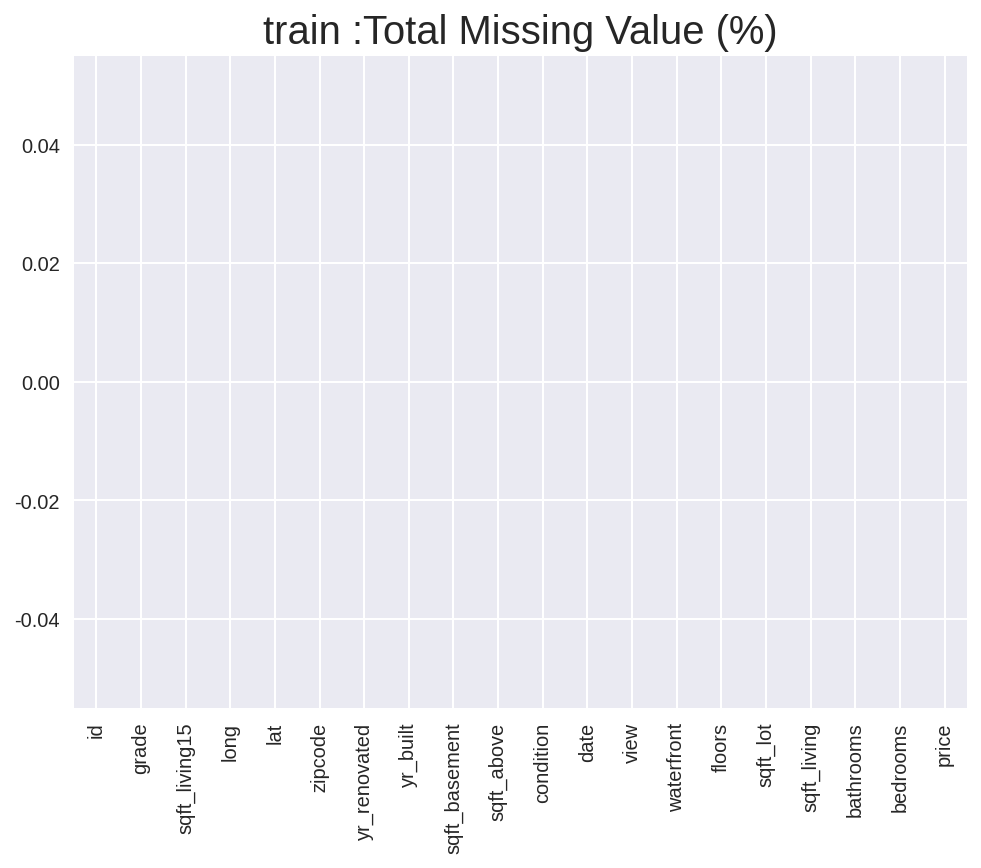


##### train 컬럼별 결측값 갯수 ######


############################## test 결측값 확인 ##############################


##### test 컬럼별 결측값 비율 시각화 ######



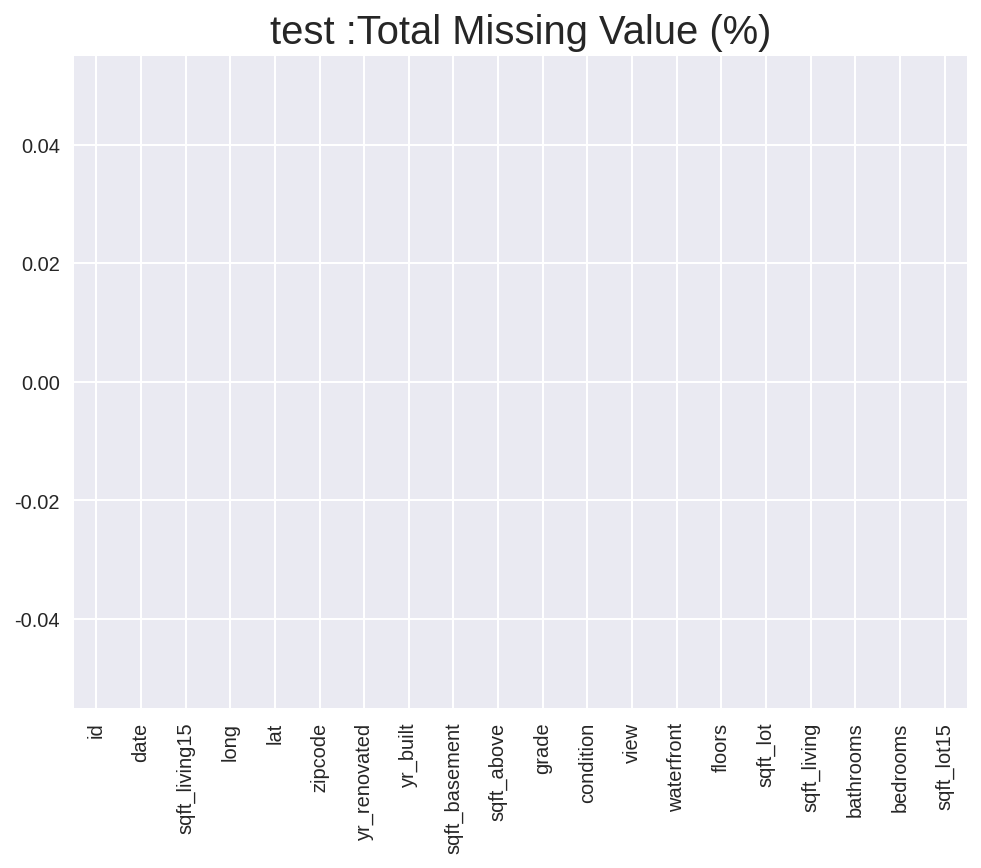


##### test 컬럼별 결측값 갯수 ######


############################## sub 결측값 확인 ##############################


##### sub 컬럼별 결측값 비율 시각화 ######



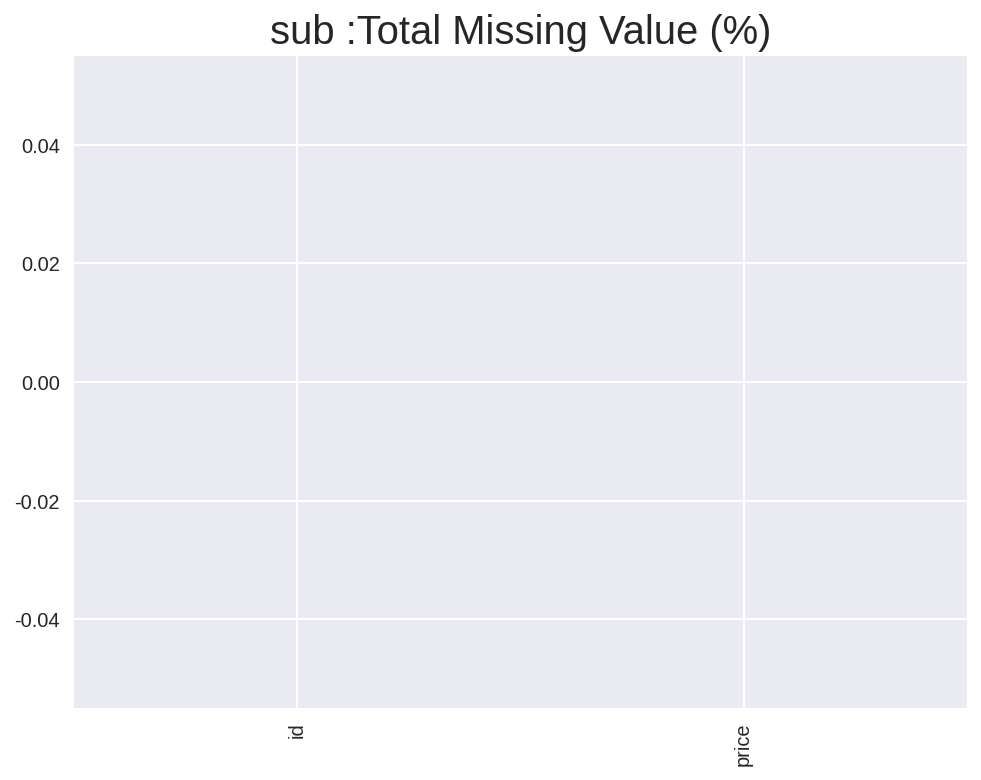


##### sub 컬럼별 결측값 갯수 ######



In [42]:
############################## 결측값 갯수 확인 ##############################

CheckData(data_dict).print_missing_value()

데이터 모두 결측값은 존재하지 않는다.

### **2-4. 단변수 분석 및 전처리**

#### **2-4-1. 종속변수 확인 & 정제**

In [43]:
############################## price 분포 파악 1) 비대칭도, 첨도 확인 ##############################
skew = train['price'].skew()
kurt = train['price'].kurt()
print(f"Skewness: {skew:.2f} , Kurtosis: {kurt:.2f}" )

    
# 수치형 변수의 Skewness(비대칭도), Kurtosis(첨도)를 확인합니다.
# 이는 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다. (비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)

Skewness: 4.29 , Kurtosis: 40.15


일반적으로 왜도는 절댓값 3미만, 첨도는 절댓값 7미만까진 왜도가 크지않다고 판단한다. price는 왜도값이 4.29로 평균값보다 더 낮은 가격으로 많은 집이 팔리고 있다고 해석할 수 있다. 그리고 첨도는 40.15으로 아주 큰 값인데 이는 이상치가 아주 많다고 해석할 수 있다. 우선 시각화로 전체 분포를 다시 확인해보도록하겠다.

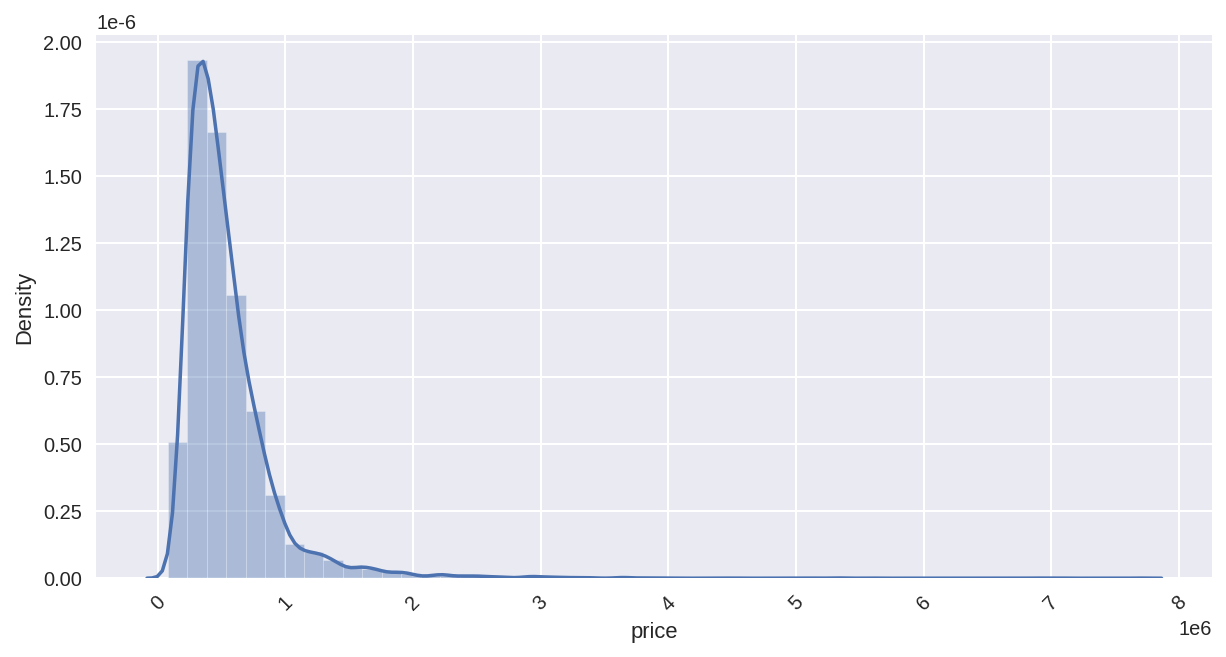

In [44]:
############################## price 분포 파악 2) Histogram ##############################
# 소숫점 생기지않게 표시
# from matplotlib.ticker import MaxNLocator

# ax = plt.figure().gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# sns.distplot(train['price'],ax=ax)



plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
# # 캔버스에 그림 그리기
sns.distplot(train['price']/100)

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([  78000.,   80000.,   81000., ..., 6885000., 7062500., 7700000.])),
 (311259.39937053947, 540682.653142667, 0.8376098994462499))

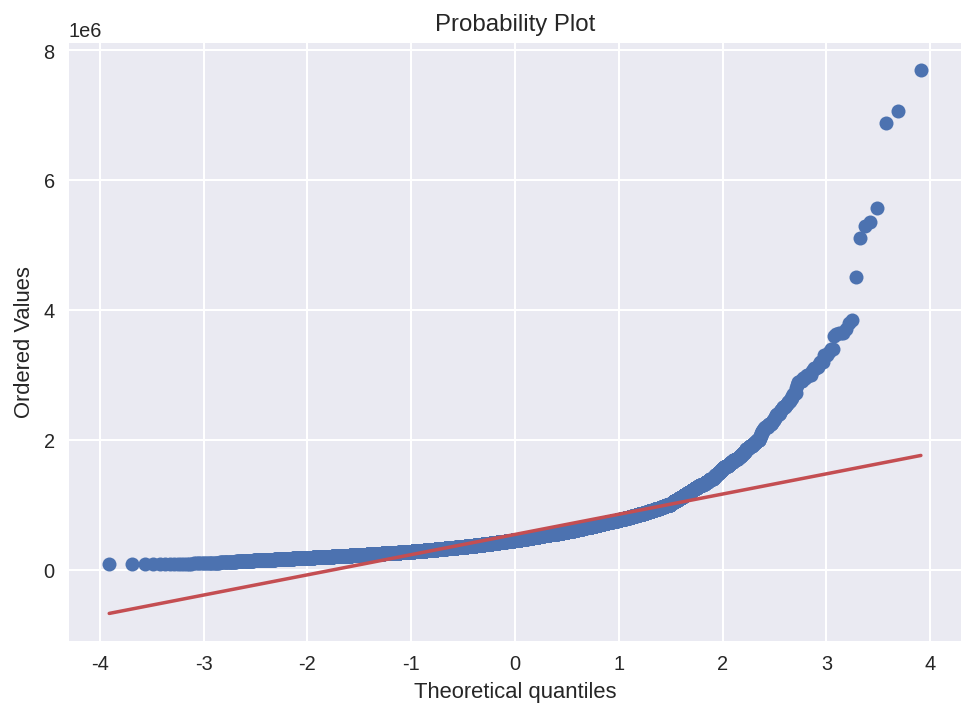

In [ ]:
stats.probplot(train['price'], plot=plt)

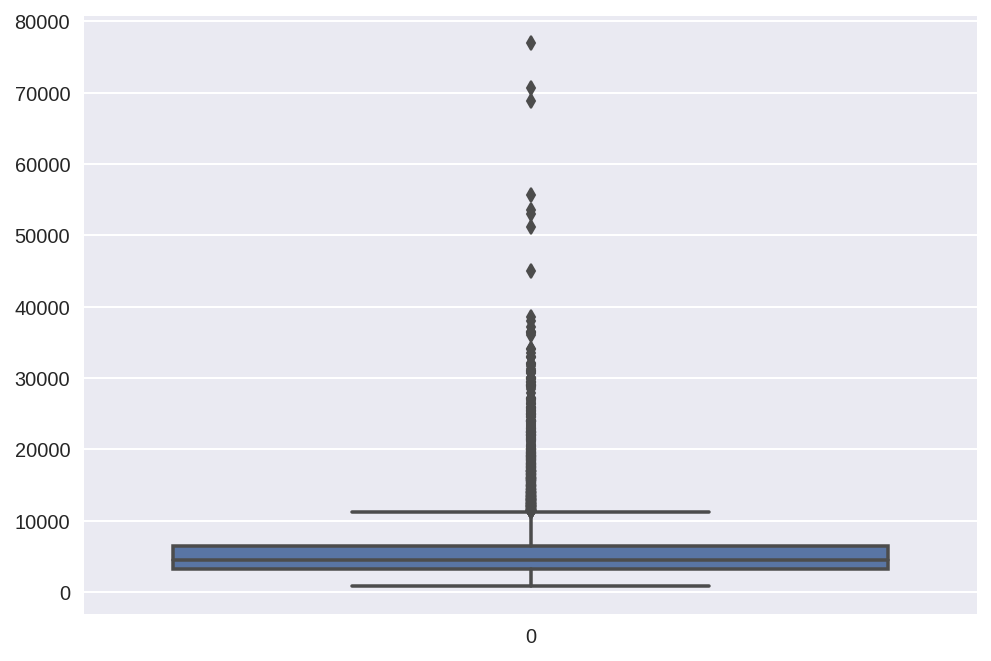

In [46]:
############################## price 분포 파악 3) Boxplot ##############################
sns.boxplot( data=train['price']/100)

큰 이상치가 있음을 알 수 있다. 우선 이상치에 대해 더 살펴보기 위해서 price가 상위 99%값 이상인 데이터를 확인해보겠다.

In [56]:
outlier_point = train["price"].quantile(0.99)
outlier_train=train[train['price'] >= outlier_point]

print('outlier값: ',outlier_point)
print('outlier갯수: ',len(outlier_train))
print('전체 데이터갯수 대비 outlier 갯수: ',len(outlier_train)/len(train))


outlier값:  1973299.9999999993
outlier갯수:  151
전체 데이터갯수 대비 outlier 갯수:  0.010043232457598935


Skewness: 4.29 , Kurtosis: 4.08


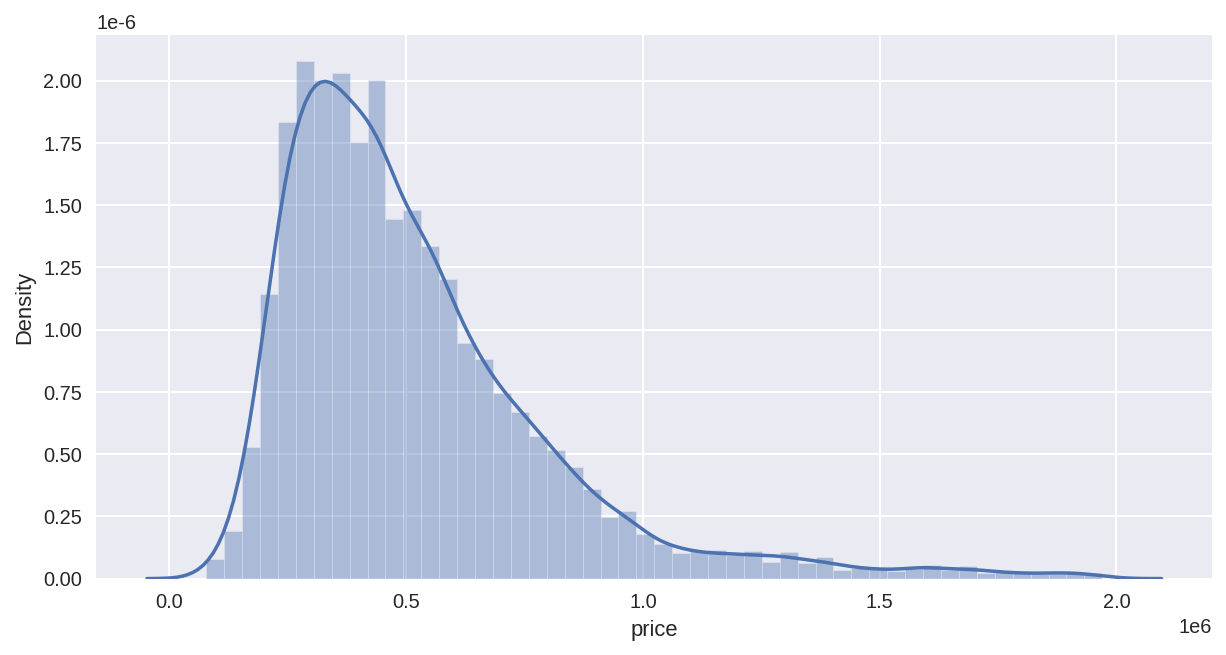

In [57]:

train_outlier_removed =train[train['price'] < outlier_point]
kew = train_outlier_removed['price'].skew()
kurt = train_outlier_removed['price'].kurt()
print(f"Skewness: {skew:.2f} , Kurtosis: {kurt:.2f}" )

plt.figure(figsize=(10,5))
sns.distplot(train_outlier_removed['price'])

상위 99퍼센트값을 확인해보니 151개로 확인됐다. 이 값들을 제외한 데이터의 왜도와 첨도, 분포를 시각화해보니 왼쪽

#### **2-4-2. 독립변수 확인 & 정제**

##### 연속형 변수 

In [ ]:
############################## 분포 파악 1) 비대칭도, 첨도 확인 ##############################


In [ ]:
############################## 분포 파악 2) Histogram ##############################

In [ ]:
############################## 분포 파악 3) Boxplot ##############################

In [ ]:
############################## 분포 파악 4) 이상치 확인 - 분포보고 이상한것 있으면 제거 ##############################


##### 범주형 변수

In [ ]:
############################## 분포 파악 1) Boxplot ##############################


In [ ]:
############################## 분포 파악 1) Pie Chart ##############################


In [ ]:
############################## 인코딩 ##############################
# 순서가 있는 변수는 원핫 인코딩을 하는 것보다 수치형 데이터로 바꿔주는 것이 적절하다고 생각한다.
# 순서에 대한 정보가 사라지기 때문

### **2-6. 이진변수 분석**

- 카이제곱 검정
- 상관관계 분석
- t 검정 및 일원분산분석
- 산점도 및 히트맵 시각화

In [ ]:
############################## zipcode 활용해서 지역뽑아내기 ##############################
############################## 지역별 가격도 알아보기  ##############################

### **2-7. 3개 이상 변수 분석**

## **3. 모델 구현 및 평가**
---

### **3-1. train/test 나누기**


In [ ]:
############################## 학습데이터 나누기 & 교차검증 ##############################

X = digits_data_scaled
y = digits_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, randomstate=0)


### **3-3. 모델 학습 및 예측**

### **3-4. 모델 성능 평가**